# HDDM WORKSHOP 
## (Alexander Fengler, May 2022)

## COLAB Installation Instructions (optional)

In [ ]:
!pip install cython
!pip install pymc # if there are problems --> usually here
!pip install git+https://github.com/hddm-devs/kabuki
!pip install git+https://github.com/hddm-devs/hddm
!pip install torch torchvision torchaudio # optional

## Basic Preparation

In [64]:
# MODULE IMPORTS ----

from copy import deepcopy

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

### Initial Examples (most useful functions)

### Data Simulators

#### The `simulator_h_c()` function

This function is useful if you want to create complex datasets (e.g. for parameter recovery studies). To check specifics you can use the `help()` function.

##### Simple example

In [65]:
# Simulate some data

# 'ddm_vanilla' specifies usage of the basic ddm simulator
# recent changes to hddm allow many more models to be fit, necessitating
# explicit naming.
model = 'ddm_vanilla' 

n_samples = 1000 # number of samples (trials) the simulated data should contain
n_subjects = 1

data, parameter_dict = simulator_h_c(n_subjects = n_subjects,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = None, 
                                     depends_on = None, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [66]:
data

,rt,response,subj_idx,v,a,z,t
0,3.824635,0.0,0,-1.0989,3.405971,0.464733,1.214642
1,4.443590,0.0,0,-1.0989,3.405971,0.464733,1.214642
2,1.741639,0.0,0,-1.0989,3.405971,0.464733,1.214642
3,6.324454,0.0,0,-1.0989,3.405971,0.464733,1.214642
4,2.179633,0.0,0,-1.0989,3.405971,0.464733,1.214642
...,...,...,...,...,...,...,...
995,1.909636,0.0,0,-1.0989,3.405971,0.464733,1.214642
996,2.274635,0.0,0,-1.0989,3.405971,0.464733,1.214642
997,3.315672,0.0,0,-1.0989,3.405971,0.464733,1.214642
998,2.372640,0.0,0,-1.0989,3.405971,0.464733,1.214642


In [67]:
# Generating parameters
parameter_dict

{'t': 1.2146419557783863,
 'v': -1.0989003935862878,
 'a': 3.4059707030222266,
 'z': 0.4647334856173252}

##### Complex example

In [159]:
# Simulate some data

# 'ddm_vanilla' specifies usage of the basic ddm simulator
# recent changes to hddm allow many more models to be fit, necessitating
# explicit naming.
model = 'ddm_vanilla' 

n_samples = 1000 # number of samples (trials) the simulated data should contain
n_subjects = 10

data, parameter_dict = simulator_h_c(n_subjects = n_subjects,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [160]:
data

,rt,response,subj_idx,my_condition,v,a,z,t
0,2.776037,1.0,0,high,2.541701,3.227706,0.451161,1.530034
1,2.123030,1.0,0,high,2.541701,3.227706,0.451161,1.530034
2,2.236029,1.0,0,high,2.541701,3.227706,0.451161,1.530034
3,2.152030,1.0,0,high,2.541701,3.227706,0.451161,1.530034
4,2.313028,1.0,0,high,2.541701,3.227706,0.451161,1.530034
...,...,...,...,...,...,...,...,...
19995,2.069283,0.0,9,low,-2.334468,2.810181,0.576290,1.530286
19996,2.333279,0.0,9,low,-2.334468,2.810181,0.576290,1.530286
19997,2.045283,0.0,9,low,-2.334468,2.810181,0.576290,1.530286
19998,2.261280,0.0,9,low,-2.334468,2.810181,0.576290,1.530286


In [161]:
# Generating parameters
parameter_dict

{'t': 1.645235875422884,
 't_std': 0.36147355791707103,
 'a': 3.3083227719162775,
 'a_std': 0.1784184606357552,
 'z': 0.4283406677088955,
 'z_std': 0.10795205832669315,
 'v(high)': 2.603877911686094,
 'v(low)': -2.3752842617000884,
 'v_std': 0.08738916164893028,
 't_subj.0': 1.5300343766309914,
 'a_subj.0': 3.227705682996581,
 'z_subj.0': 0.4511607716143362,
 'v_subj(high).0': 2.541700828573444,
 't_subj.1': 1.6696964328812571,
 'a_subj.1': 3.3774028355120795,
 'z_subj.1': 0.4045825283006388,
 'v_subj(high).1': 2.469110801801776,
 't_subj.2': 2.06866487530598,
 'a_subj.2': 3.2601395758461766,
 'z_subj.2': 0.4566707097848514,
 'v_subj(high).2': 2.730958093756966,
 't_subj.3': 1.7639798230404442,
 'a_subj.3': 3.40808166135182,
 'z_subj.3': 0.3032607271511417,
 'v_subj(high).3': 2.4608604509660443,
 't_subj.4': 2.212411553503704,
 'a_subj.4': 3.322987549226314,
 'z_subj.4': 0.3703566577069205,
 'v_subj(high).4': 2.825972766971691,
 't_subj.5': 1.3916109923358708,
 'a_subj.5': 2.8210174064

#### The `simulator()` function

This function is useful for low level access to the simulators and full flexbility.
The `simulator()` function provides a `tuple`, with the following elements as output.

- `[0]` provides the *reaction times*
- `[1]` provides the *choices*
- `[2]` provides a bunch of *metadata*

In [68]:
# Get some default parameters

# The 'model_config' dictionary contains essential information about all models
# currently included in HDDM
params = hddm.model_config.model_config['ddm_vanilla']['params_default']

sim_out = hddm.simulators.simulator(theta = params,
                                    model = model,
                                    n_samples = n_samples)

theta = np.zeros((n_samples, 5))
theta[:, 0] = sim_out[2]['v'][0]
theta[:, 1] = sim_out[2]['a'][0]
theta[:, 2] = sim_out[2]['z'][0]
theta[:, 3] = sim_out[2]['t'][0]
theta[:, 4] = 0

data = pd.DataFrame(np.concatenate([(sim_out[0]), (sim_out[1]), theta], axis = 1), 
                    columns = ['rt', 'response', 'v', 'a', 'z', 't', 'subj_idx'])
data['subj_idx'] = data['subj_idx'].apply(str)

theta is supplied as list --> simulator assumes n_trials = 1


In [69]:
sim_out[2]

{'v': array([0.], dtype=float32),
 'a': array([2.], dtype=float32),
 'z': array([0.5], dtype=float32),
 't': array([0.], dtype=float32),
 's': 1.0,
 'delta_t': 0.0010000000474974513,
 'max_t': 20.0,
 'n_samples': 1000,
 'simulator': 'ddm',
 'boundary_fun_type': 'constant',
 'possible_choices': [0, 1],
 'trajectory': array([[ 1.0000000e+00],
        [ 1.0065713e+00],
        [ 9.5570523e-01],
        ...,
        [-9.9900000e+02],
        [-9.9900000e+02],
        [-9.9900000e+02]], dtype=float32),
 'model': 'ddm_vanilla'}

In [70]:
# Same format as data above
data

,rt,response,v,a,z,t,subj_idx
0,0.745994,1.0,0.0,2.0,0.5,0.0,0.0
1,1.446012,1.0,0.0,2.0,0.5,0.0,0.0
2,0.845993,1.0,0.0,2.0,0.5,0.0,0.0
3,1.691023,0.0,0.0,2.0,0.5,0.0,0.0
4,0.376999,0.0,0.0,2.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...
995,1.970036,1.0,0.0,2.0,0.5,0.0,0.0
996,0.148000,0.0,0.0,2.0,0.5,0.0,0.0
997,1.175999,0.0,0.0,2.0,0.5,0.0,0.0
998,3.413935,0.0,0.0,2.0,0.5,0.0,0.0


##### NOTE:

In the `hddm.generate` and `hddm.simulators.hddm_dataset_generators` modules you will find yet more options for *simulator* functions.

### Plot from Data

#### The `plot_from_data()` function

This function can be used to illustrate various aspects of a dataset.
The example below shows a version that includes a *cartoon of the generative model*,
(this can be very useful e.g. in investigating model behavior across parameter settings)

##### SIMPLE

subj_idx(0)


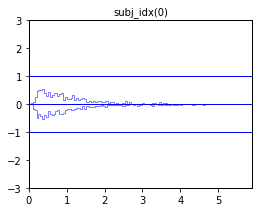

In [71]:
# Plot the dataset
hddm.plotting.plot_from_data(df = data, 
                             generative_model = 'ddm_vanilla',
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 6, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

We can also just show the *reaction times* and drop the *model cartoon*.

subj_idx(0)


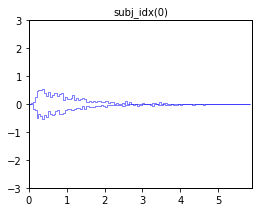

In [72]:
# Plot the dataset
hddm.plotting.plot_from_data(df = data, 
                             #generative_model = 'ddm_vanilla',
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 6, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': False # NOTE WE DO NOT SHOW THE MODEL NOW
                               }) 
plt.show()

##### COMPLEX

In [174]:
# Simulate some data

# 'ddm_vanilla' specifies usage of the basic ddm simulator
# recent changes to hddm allow many more models to be fit, necessitating
# explicit naming.
model = 'ddm_vanilla' 

n_samples = 1000 # number of samples (trials) the simulated data should contain
n_subjects = 10

data, parameter_dict = simulator_h_c(n_subjects = n_subjects,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"condition": ["high", "low"]}, 
                                     depends_on = {"v": ["condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

new round of data simulation because parameter bounds where violated


In [175]:
data

,rt,response,subj_idx,condition,v,a,z,t
0,1.684491,1.0,0,high,2.157570,2.360805,0.600673,1.391491
1,1.585491,1.0,0,high,2.157570,2.360805,0.600673,1.391491
2,1.838489,1.0,0,high,2.157570,2.360805,0.600673,1.391491
3,1.645491,1.0,0,high,2.157570,2.360805,0.600673,1.391491
4,2.287483,1.0,0,high,2.157570,2.360805,0.600673,1.391491
...,...,...,...,...,...,...,...,...
19995,3.319158,0.0,9,low,-1.550048,2.499982,0.554414,0.994144
19996,2.320150,0.0,9,low,-1.550048,2.499982,0.554414,0.994144
19997,2.128141,0.0,9,low,-1.550048,2.499982,0.554414,0.994144
19998,1.510141,0.0,9,low,-1.550048,2.499982,0.554414,0.994144


condition(high)_subj_idx(0)
condition(high)_subj_idx(1)
condition(high)_subj_idx(2)
condition(high)_subj_idx(3)
condition(high)_subj_idx(4)
condition(high)_subj_idx(5)
condition(high)_subj_idx(6)
condition(high)_subj_idx(7)
condition(high)_subj_idx(8)
condition(high)_subj_idx(9)
condition(low)_subj_idx(0)
condition(low)_subj_idx(1)
condition(low)_subj_idx(2)
condition(low)_subj_idx(3)
condition(low)_subj_idx(4)
condition(low)_subj_idx(5)
condition(low)_subj_idx(6)
condition(low)_subj_idx(7)
condition(low)_subj_idx(8)
condition(low)_subj_idx(9)


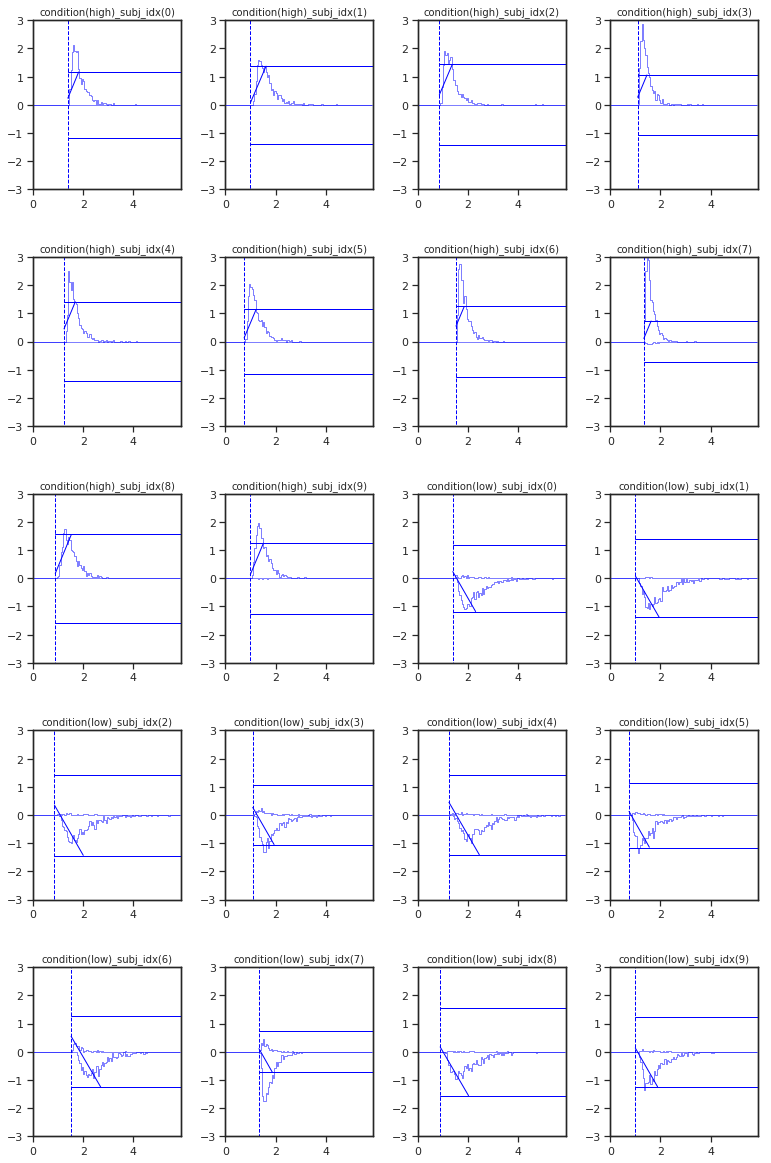

In [177]:
# Plot the dataset
hddm.plotting.plot_from_data(df = data, 
                             generative_model = 'ddm_vanilla',
                             columns = 4,
                             groupby = ['condition', 'subj_idx'],
                             figsize = (13, 20),
                             value_range = np.arange(0, 6, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

##### NOTE

Via the `**kwargs` you have many styling options with this plot. 

### A First Model Fit

In [73]:
# Define the HDDM model
includes = hddm.model_config.model_config[model]['hddm_include']
n_models = 2
hddm_models = []

for i in range(n_models):
    hddm_models.append(hddm.HDDM(data,
                           informative = True,
                           is_group_model = False,
                           include = ['z'],
                           p_outlier = 0))

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm


In [74]:
# Sample
nmcmc = 2000

for i in range(n_models):
    print(i)
    hddm_models[i].sample(nmcmc,
                      burn = 1000)

0
 [-----------------100%-----------------] 2000 of 2000 complete in 27.1 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 27.1 sec

In [ ]:
# Save the model


##### NOTE

You can parallelize the model fits using the `multiprocessing` library for example.
See the template below:

```
# imports ...
from functools import partial
from multiprocessing import Pool
import psutil
# etc. etc.

def run_model(chain_id, data, x, y, z):
    import hddm

    # Process x,y,z ...
  
    # Define Model
    model = hddm.HDDM(data,
              informative = x,
              is_group_model = True,
              include = y,
              p_outlier = z)
    
    # Sample
    model.sample(1000, burn = 500, dbname = 'db_name_' + str(chain_id) + '.db', db = 'pickle')
    
    # Save
    model.save('my_model_' + str(chain_id) + '.pickle')
    
    return 0
    
if __name__ == "__main__":
    n_cpus = psutil.cpu_count(logical = False)
    n_chains = ...
    data = ...
    x = ...
    y = ...
    z = ...
    
    run_model_prepped = partial(run_model, data = data, x = x, y = y, z = z)
    
    with Pool(processes = n_cpus) as pool:
        pool_out = pool.map(run_model_prepped, [1, 2, ... , n_chains])
    
    print("Finished")
```


### Reporting HDDM results

#### Posterior Statistics

In [85]:
# Posterior Means
hddm_models[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.003711,0.026884,1.951596,1.985618,2.00387,2.023129,2.052794,0.000961
v,0.049625,0.03573,-0.018338,0.026168,0.050174,0.072758,0.119664,0.001434
t,0.0178,0.005544,0.007874,0.013926,0.017725,0.02143,0.029501,0.000209
z,0.493398,0.010244,0.473106,0.486305,0.493118,0.499865,0.514032,0.000406


#### Posterior Samples

In [86]:
# A look at the traces
hddm_models[0].get_traces()

,a,v,t,z_trans
0,2.007547,0.047144,0.017997,-0.018809
1,1.991554,0.057724,0.021705,-0.026285
2,1.973084,0.072072,0.018789,-0.027659
3,1.989397,0.047105,0.027749,-0.029113
4,1.996690,0.047332,0.016645,0.047092
...,...,...,...,...
995,2.032563,0.058413,0.015066,-0.072807
996,2.004257,0.057392,0.015721,-0.072493
997,1.983601,0.118204,0.022722,-0.070103
998,1.948091,0.094528,0.032545,-0.065275


#### Convergence

In [178]:
# (Does not seem to be working atm)
from kabuki.analyze import check_geweke
print(check_geweke(hddm_models[1], assert_ = False))

Chain of knode_name    z_trans
stochastic       True
observed        False
subj            False
node          z_trans
tag                ()
depends            []
hidden           True
rt                NaN
response          NaN
v                 NaN
a                 NaN
z                 NaN
t                 NaN
subj_idx          NaN
mean              NaN
std               NaN
2.5q              NaN
25q               NaN
50q               NaN
75q               NaN
97.5q             NaN
mc err            NaN
Name: z_trans, dtype: object not properly converged
False


In [179]:
from kabuki.analyze import gelman_rubin
gelman_rubin(hddm_models)

{'a': 1.0003279047823501,
 'v': 1.0006753265414077,
 't': 1.0007127214582006,
 'z_trans': 0.9995739323167642}

Plotting a
Plotting v
Plotting t
Plotting z


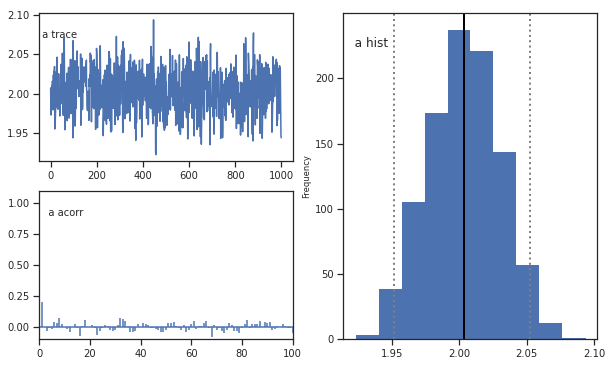

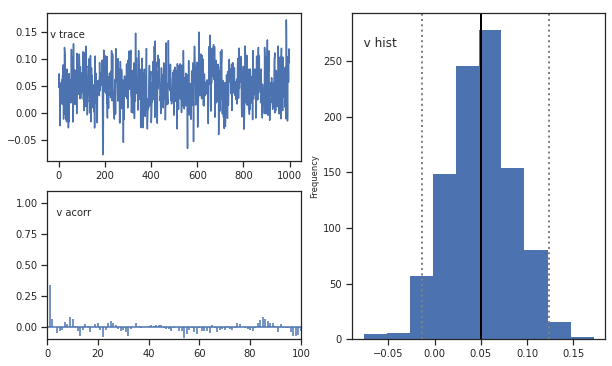

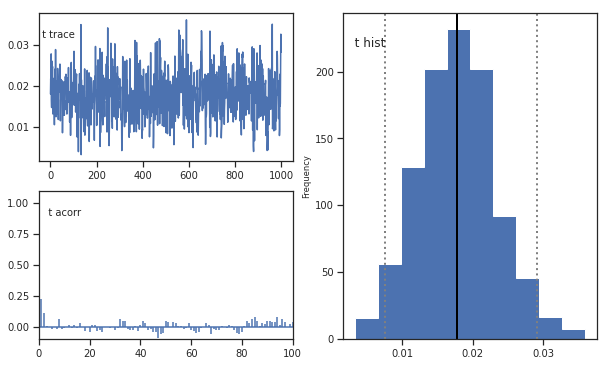

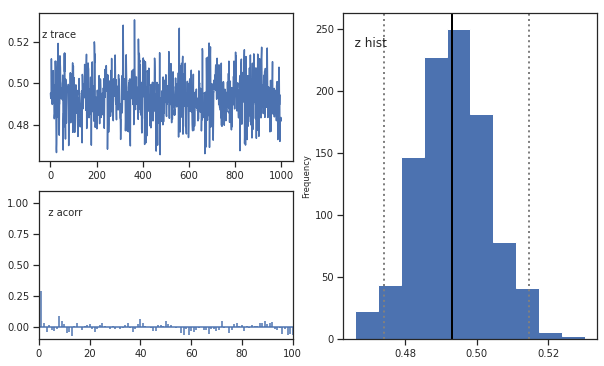

In [180]:
# Plot the traces
hddm_models[0].plot_posteriors()

#### Other Plots

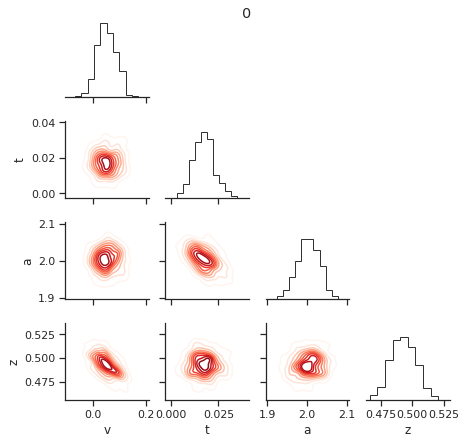

In [90]:
# Posterior Predictive Plots
hddm.plotting.plot_posterior_pair(hddm_models[0],
                                  parameter_recovery_mode = False,
                                  samples = 500,
                                  figsize = (6, 6))

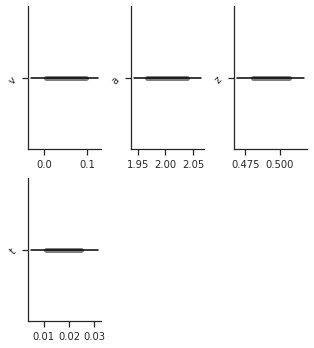

In [91]:
# Caterpillar plots
hddm.plotting.plot_caterpillar(hddm_model = hddm_models[0],
                              ground_truth_parameter_dict = None,
                              figsize = (5, 5),
                              columns = 3)

#### Posterior Predictives

##### Access via plotting: `plot_posterior_predictive()`

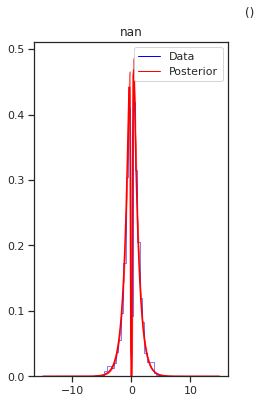

In [92]:
# Posterior Predictive
# FIX: IMPROVE LABELING
hddm.plotting.plot_posterior_predictive(model = hddm_models[0],
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(-15, 15, 0.1),
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.4,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3}})
plt.show()

##### Lower level access: `post_pred_gen()`

In [93]:
# Direct access to posterior predictives
posterior_predictive_sample = hddm.utils.post_pred_gen(model = hddm_models[0],
                                                       samples = 200,
                                                       groupby = ['subj_idx'],
                                                       append_data = True)

 [-----------------100%-----------------] 1 of 1 complete in 0.0 sec

In [94]:
posterior_predictive_sample

rt_sampled  response_sampled  index        rt  response    v  \
node sample                                                                     
wfpt 0      0     -0.420229                 0      0  0.745994       1.0  0.0   
            1     -0.225231                 0      1  1.446012       1.0  0.0   
            2     -0.449229                 0      2  0.845993       1.0  0.0   
            3      0.168231                 1      3 -1.691023       0.0  0.0   
            4     -1.859261                 0      4 -0.376999       0.0  0.0   
...                     ...               ...    ...       ...       ...  ...   
     199    995   -1.183842                 0    995  1.970036       1.0  0.0   
            996    1.840872                 1    996 -0.148000       0.0  0.0   
            997   -0.492840                 0    997 -1.175999       0.0  0.0   
            998   -1.401852                 0    998 -3.413935       0.0  0.0   
            999    0.189843                 1    999  1.329006       1.0  0.0   

                   a    z    t subj_idx  
node sample                              
wfpt 0      0    2.0  0.5  0.0      0.0  
            1    2.0  0.5  0.0      0.0  
            2    2.0  0.5  0.0      0.0  
            3    2.0  0.5  0.0      0.0  
            4    2.0  0.5  0.0      0.0  
...              ...  ...  ...      ...  
     199    995  2.0  0.5  0.0      0.0  
            996  2.0  0.5  0.0      0.0  
            997  2.0  0.5  0.0      0.0  
            998  2.0  0.5  0.0      0.0  
            999  2.0  0.5  0.0      0.0  

[200000 rows x 10 columns]

From here we can compute any quantity we want, comparing any aspect of our original dataset with the synthetic data we can generate via the posterior predictives.

##### Lowest level access: `simulator()`

Using the simulator function gives you the greates amount of flexibility. Just take posterior samples from the traces and use them as parameter (`theta`) inputs to the simulator function directly. There is essentially nothing you shouldn't be able to do.

### More Complex Models

#### Condition / Regression, simplest case

We show how to replicate an analysis using the basic `HDDM()` class, with the `HDDMRegressor()` class.

In [95]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 1000

data, parameter_dict = simulator_h_c(n_subjects = 1,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

data_new = deepcopy(data)
data_new["my_condition_reg"] = 0
data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

data_new

,rt,response,subj_idx,my_condition,v,a,z,t,my_condition_reg
0,1.140126,1.0,0,high,0.763079,2.265519,0.507029,0.672129,1
1,1.145126,1.0,0,high,0.763079,2.265519,0.507029,0.672129,1
2,1.171126,1.0,0,high,0.763079,2.265519,0.507029,0.672129,1
3,1.356123,1.0,0,high,0.763079,2.265519,0.507029,0.672129,1
4,1.878129,1.0,0,high,0.763079,2.265519,0.507029,0.672129,1
...,...,...,...,...,...,...,...,...,...
1995,2.238146,0.0,0,low,-0.295197,2.265519,0.507029,0.672129,0
1996,1.410123,0.0,0,low,-0.295197,2.265519,0.507029,0.672129,0
1997,0.948129,1.0,0,low,-0.295197,2.265519,0.507029,0.672129,0
1998,0.960129,0.0,0,low,-0.295197,2.265519,0.507029,0.672129,0


##### Using `HDDM()` and `depends_on`

In [96]:
hddm_models_condition = []

for i in range(n_models):
    hddm_models_condition.append(hddm.HDDM(data_new,
                                 informative = True,
                                 is_group_model = False,
                                 depends_on = {'v': 'my_condition'},
                                 include = ['z'],
                                 p_outlier = 0))

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_condition[i].sample(nmcmc,
                                    burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 55.2 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 55.7 sec

In [97]:
hddm_models_condition[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.298665,0.026516,2.245139,2.279327,2.299191,2.316473,2.353456,0.001166
v(high),0.797105,0.034372,0.724858,0.774497,0.79773,0.821774,0.861422,0.001498
v(low),-0.320315,0.032575,-0.385889,-0.34186,-0.321094,-0.297906,-0.25743,0.001412
t,0.668975,0.007513,0.653923,0.664212,0.669071,0.674122,0.682932,0.000316
z,0.496981,0.008041,0.481783,0.49176,0.496755,0.502397,0.513801,0.000421


##### Using `HDDMRegressor()`

In [98]:
hddm_models_reg = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + my_condition_reg', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_reg.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              informative = True,
                                              is_group_model = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_reg[i].sample(nmcmc,
                                    burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2001 of 2000 complete in 93.5 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 94.2 sec

In [99]:
hddm_models_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.296405,0.026792,2.246993,2.277891,2.29568,2.314694,2.348471,0.001221
t,0.669372,0.007311,0.653783,0.664567,0.669801,0.674233,0.683461,0.000331
z,0.497537,0.007733,0.481877,0.492294,0.49768,0.502362,0.513386,0.000296
v_Intercept,-0.320835,0.032085,-0.388168,-0.341499,-0.320277,-0.300143,-0.260738,0.00165
v_my_condition_reg,1.116622,0.043233,1.037758,1.086725,1.116066,1.145804,1.202238,0.002267


#### Condition / Regression, hierarchical

Replicating the analysis above, but this time using a hierarchical model.

In [102]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 200

data, parameter_dict = simulator_h_c(n_subjects = 10,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)


data_new
data_new = deepcopy(data)

data_new["my_condition_reg"] = 0
data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

##### Using `HDDM()` and `depends_on`

In [103]:
# Define the HDDM model
hddm_models_group_condition = []

for i in range(n_models):
    hddm_models_group_condition.append(hddm.HDDM(data_new,
                                 informative = True,
                                 is_group_model = True,
                                 depends_on = {'v': 'my_condition'},
                                 include = ['z'],
                                 p_outlier = 0))

# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_group_condition[i].sample(nmcmc,
                                          burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 287.7 sec

In [105]:
hddm_models_group_condition[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.358488,0.235543,2.899337,3.218462,3.360593,3.498203,3.837994,0.008014
a_std,0.735704,0.219488,0.449129,0.588062,0.696281,0.818303,1.282808,0.01012
a_subj.0,3.135786,0.096541,2.959903,3.071791,3.130502,3.195895,3.33056,0.004836
a_subj.1,3.915702,0.109048,3.722029,3.833742,3.913575,3.989058,4.146522,0.005763
a_subj.2,3.590351,0.115039,3.373631,3.509263,3.590253,3.665573,3.820499,0.006634
a_subj.3,2.744258,0.074493,2.607661,2.692525,2.7398,2.793862,2.892977,0.003589
a_subj.4,3.022045,0.084356,2.860937,2.965078,3.023041,3.078884,3.193431,0.004155
a_subj.5,4.211003,0.118596,3.973059,4.134133,4.212184,4.292379,4.433622,0.006231
a_subj.6,3.767138,0.116839,3.543968,3.691554,3.761995,3.841296,3.999696,0.006726
a_subj.7,3.045127,0.085201,2.889791,2.989774,3.041789,3.102994,3.218014,0.004249


##### Using `HDDMRegressor()`

In [ ]:
hddm_models_group_reg = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + my_condition_reg', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_group_reg.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              informative = True,
                                              is_group_model = True,
                                              group_only_regressors = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg[i].sample(nmcmc,
                              burn = 1000)

In [ ]:
hddm_models_group_reg[0].gen_stats()

#### Regression + *depends_on*

In [38]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 200

data, parameter_dict = simulator_h_c(n_subjects = 10,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

data_new = deepcopy(data)
data_new["my_condition_reg"] = 0
data_new.loc[data["my_condition"] == "high", "my_condition_reg"] = 1
data_new["randcol"] = np.random.uniform(low = -1, high = 1, size = data_new.shape[0])

In [181]:
parameter_dict

{'t': 1.0956236809663151,
 't_std': 0.36153470532750337,
 'a': 2.3987920506815574,
 'a_std': 0.44853885224372453,
 'z': 0.5824933000251871,
 'z_std': 0.0507156934673811,
 'v(high)': 2.1223652938583477,
 'v(low)': -1.5441822986117126,
 'v_std': 0.020602361331720668,
 't_subj.0': 1.3914911060790869,
 'a_subj.0': 2.3608048141635436,
 'z_subj.0': 0.6006726882781929,
 'v_subj(high).0': 2.1575695441422305,
 't_subj.1': 0.999842535039628,
 'a_subj.1': 2.7797426771005433,
 'z_subj.1': 0.5290452404401684,
 'v_subj(high).1': 2.082032695410016,
 't_subj.2': 0.855181714219047,
 'a_subj.2': 2.8747576512242032,
 'z_subj.2': 0.6230804763632796,
 'v_subj(high).2': 2.09589585227028,
 't_subj.3': 1.089597807063437,
 'a_subj.3': 2.1223157120001312,
 'z_subj.3': 0.6270381813299873,
 'v_subj(high).3': 2.1355790095094687,
 't_subj.4': 1.2382913507436906,
 'a_subj.4': 2.8307906151385387,
 'z_subj.4': 0.6599024007041414,
 'v_subj(high).4': 2.1305908033730074,
 't_subj.5': 0.7457179652624681,
 'a_subj.5': 2.30

In [41]:
hddm_models_group_reg_depends = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + randcol', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_group_reg_depends.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              depends_on = {'v': ['my_condition']},
                                              informative = True,
                                              is_group_model = True,
                                              std_depends = True,
                                              group_only_regressors = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg_depends[i].sample(nmcmc,
                                            burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2001 of 2000 complete in 587.5 sec

In [42]:
hddm_models_group_reg_depends[0].gen_stats()[25:50]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
z_std,0.102684,0.024171,0.057931,0.086993,0.101393,0.117627,0.151707,0.001427
z_subj.0,0.413369,0.014913,0.383591,0.403555,0.413233,0.423083,0.443198,0.000825
z_subj.1,0.386813,0.013977,0.357322,0.377294,0.387316,0.395517,0.413644,0.000647
z_subj.2,0.376404,0.014139,0.348811,0.36674,0.375752,0.386271,0.405162,0.000661
z_subj.3,0.403771,0.014924,0.374498,0.393583,0.403861,0.413832,0.43412,0.00082
z_subj.4,0.42611,0.015274,0.396572,0.415345,0.425568,0.437214,0.455601,0.000842
z_subj.5,0.391867,0.015472,0.360983,0.382067,0.391477,0.401225,0.425725,0.000892
z_subj.6,0.366345,0.014991,0.338337,0.356246,0.366112,0.376962,0.395316,0.000827
z_subj.7,0.410237,0.014381,0.383989,0.400026,0.409458,0.419461,0.442028,0.000695
z_subj.8,0.344761,0.01579,0.315043,0.333926,0.344502,0.354455,0.377851,0.001007


### Link Functions

In [106]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 1000

data, parameter_dict = simulator_h_c(n_subjects = 1,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = None, 
                                     depends_on = None,
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [107]:
parameter_dict

{'t': 1.5478165127660082,
 'v': 1.9219427339376698,
 'a': 2.2135732536769344,
 'z': 0.7197706472693461}

##### SOME NOTES:

In principle you are free to choose link function as you please. 

The general model you will fit is of the following form (take the drift parameter as an example):

$$ \hat{v} = link(\mathbf{X} \beta) $$

Using the **identity link** leaves us with,

$$ \hat{v} = \mathbf{X} \beta $$

Using the **logistic link** leave us with,

$$ \hat{v} = \frac{1}{1 + \exp( - \mathbf{X} \beta)} $$

The **identity function** will most often be the right choice.

#### Example 1: Identity Link on z

In [109]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1', 'link_func': identity_link}]

hddm_models_link_id = []
n_models = 1

for i in range(n_models):
    hddm_models_link_id.append(hddm.HDDMRegressor(data,
                                               reg_models,
                                               informative = True,
                                               is_group_model = False,
                                               group_only_regressors = True,
                                               include = ['z'],
                                               p_outlier = 0))
    
# Sample
nmcmc = 1500
for i in range(1):
    print(i)
    hddm_models_link_id[i].sample(nmcmc,
                                  burn = 500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 750 of 750 complete in 25.6 sec

In [111]:
hddm_models_link_id[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.050221,0.104451,1.849702,1.973398,2.046556,2.130906,2.256317,0.009504
t,1.548885,0.004368,1.53886,1.546277,1.549266,1.55201,1.556593,0.000361
z_Intercept,0.701831,0.019907,0.66032,0.688548,0.703669,0.716332,0.737142,0.001857
v_Intercept,1.886155,0.08823,1.719043,1.83179,1.882463,1.940077,2.072553,0.006773


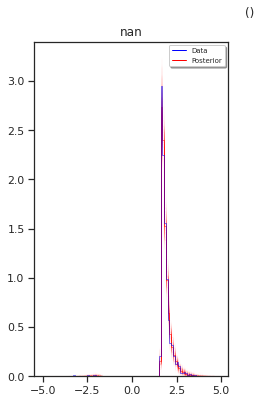

In [112]:
# Posterior Predictive
hddm.plotting.plot_posterior_predictive(model = hddm_models_link_id[0],
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(-5, 5, 0.05),
                                        parameter_recovery_mode = False,
                                        required_method="random",
                                        plot_func = hddm.plotting._plot_func_posterior_node_from_sim,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.1,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'plot_likelihood_raw': False,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3},
                                           'posterior_uncertainty_color': 'red'})

#### Example 2: Logit link on z

In [113]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': logit_link},
              {'model': 'v ~ 1', 'link_func': identity_link}]

hddm_models_link_logit = []
n_models = 1

for i in range(n_models):
    hddm_models_link_logit.append(hddm.HDDMRegressor(data,
                                               reg_models,
                                               informative = True,
                                               is_group_model = False,
                                               group_only_regressors = True,
                                               include = ['z'],
                                               p_outlier = 0))
    
# Sample
nmcmc = 1500
for i in range(1):
    print(i)
    hddm_models_link_logit[i].sample(nmcmc,
                                     burn = 500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1500 of 1500 complete in 50.1 sec

In [114]:
hddm_models_link_id[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.050221,0.104451,1.849702,1.973398,2.046556,2.130906,2.256317,0.009504
t,1.548885,0.004368,1.53886,1.546277,1.549266,1.55201,1.556593,0.000361
z_Intercept,0.701831,0.019907,0.66032,0.688548,0.703669,0.716332,0.737142,0.001857
v_Intercept,1.886155,0.08823,1.719043,1.83179,1.882463,1.940077,2.072553,0.006773


##### NOTES:

When the **logit link** is used (any link), we have to transform the **z_Intercept** parameter.

In [115]:
z_intercept = hddm_models_link_id[0].gen_stats().loc['z_Intercept', 'mean']

print('Computed z')
print( 1 / (1 + np.exp(-z_intercept)))

print('Ground Truth z')
print(parameter_dict['z'])

Computed z
0.6685934983371414
Ground Truth z
0.7197706472693461


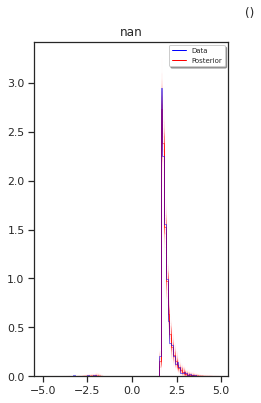

In [116]:
# Posterior Predictive
hddm.plotting.plot_posterior_predictive(model = hddm_models_link_id[0],
                                        columns = 2,
                                        figsize = (8, 6),
                                        value_range = np.arange(-5, 5, 0.05),
                                        parameter_recovery_mode = False,
                                        required_method="random",
                                        plot_func = hddm.plotting._plot_func_posterior_node_from_sim,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.1,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'plot_likelihood_raw': False,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3},
                                           'posterior_uncertainty_color': 'red'})

##### NOTES:

If we *do not* use the *identity* link on a parameter, the *prior* on it's *intercept* will default to a *normal distribution*.

If we *do* use the *identity* link on a parameter, the *prior* will be the same as the *informative* prior chosen when estimating this parameter *without a regression model*.

#### Example 3: Less Standard use case - Stimulus Coding 

We will refer to the slides to discuss stimulus coding, before proceeding to the example.

In [119]:
# Simulate some StimCoding Data
n_samples = 1000
v = np.concatenate([np.ones(500), - np.ones(500)])
a = 3
z = 0.5
t = 1

theta = np.zeros((n_samples, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [120]:
sim_out = hddm.simulators.simulator(theta = theta, 
                                    model = 'ddm_vanilla',
                                    n_samples = 1,
                                    max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])
data['stim'] = 2
data.loc[data['v'] == -1., 'stim'] = 1

##### VIA STIMCODING

In [121]:
hddm_models_stim = []
n_models = 1

for i in range(n_models):
    hddm_models_stim.append(hddm.HDDMStimCoding(data,
                                                split_param = 'v',
                                                stim_col = 'stim',
                                                informative = True,
                                                is_group_model = False,
                                                include = ['z'],
                                                p_outlier = 0))
    
# Sample
nmcmc = 1500
for i in range(1):
    print(i)
    hddm_models_stim[i].sample(nmcmc,
                               burn = 500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1500 of 1500 complete in 28.9 sec

In [122]:
hddm_models_stim[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.957622,0.070235,2.826668,2.911155,2.956551,3.007138,3.101926,0.004271
v,0.967218,0.031596,0.903703,0.945532,0.966456,0.988329,1.029731,0.001266
t,1.012671,0.017729,0.976559,1.000373,1.013659,1.024677,1.045842,0.001105
z,0.495429,0.008173,0.479491,0.490306,0.495292,0.500559,0.512996,0.000284


##### VIA REGRESSION

In [123]:
from patsy import dmatrix
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

def stim_coding(x, data = data):
    stim = np.squeeze((np.asarray(dmatrix('0 + C(s,[[-1],[1]])', {'s':data.stim.loc[x.index]}))))
    return x * stim
    

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1', 'link_func': stim_coding}]

hddm_models_stim_reg = []
n_models = 1

for i in range(n_models):
    hddm_models_stim_reg.append(hddm.HDDMRegressor(data,
                                                       reg_models,
                                                       informative = True,
                                                       is_group_model = False,
                                                       group_only_regressors = True,
                                                       include = ['z'],
                                                       p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_stim_reg[i].sample(nmcmc,
                                       burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 123.9 sec

In [124]:
hddm_models_stim_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.960254,0.069117,2.83554,2.912022,2.956791,3.008465,3.10256,0.004257
t,1.013042,0.017076,0.97741,1.00225,1.013777,1.024703,1.043781,0.000985
z_Intercept,0.495004,0.008179,0.478554,0.489953,0.4952,0.500408,0.510585,0.000275
v_Intercept,0.970369,0.032902,0.908746,0.948421,0.970215,0.991946,1.039381,0.001531


##### VIA REGRESSION - ALTERNATIVE VERSION (VIA COLUMN TRANSFORM)

In [125]:
data['stimalt'] = 1
data.loc[data['stim'] == 2, 'stimalt'] = -1

In [126]:
data

,rt,response,v,a,z,t,stim,stimalt
0,2.926034,1.0,1.0,3.0,0.5,1.0,2,-1
1,1.488997,1.0,1.0,3.0,0.5,1.0,2,-1
2,2.251002,1.0,1.0,3.0,0.5,1.0,2,-1
3,2.281004,1.0,1.0,3.0,0.5,1.0,2,-1
4,6.742766,1.0,1.0,3.0,0.5,1.0,2,-1
...,...,...,...,...,...,...,...,...
995,3.324014,0.0,-1.0,3.0,0.5,1.0,1,1
996,2.127997,0.0,-1.0,3.0,0.5,1.0,1,1
997,2.021992,0.0,-1.0,3.0,0.5,1.0,1,1
998,2.307005,0.0,-1.0,3.0,0.5,1.0,1,1


In [128]:
from patsy import dmatrix
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

def stim_coding(x, data = data):
    stim = np.squeeze((np.asarray(dmatrix('0 + C(s,[[-1],[1]])', {'s':data.stim.loc[x.index]}))))
    return x * stim

def stim_coding_alt(x, data = data):
    return x * data.stimalt.loc[x.index].values
    

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 0 + stimalt', 'link_func': stim_coding_alt}]

hddm_models_stim_reg_alt = []
n_models = 1

for i in range(n_models):
    hddm_models_stim_reg_alt.append(hddm.HDDMRegressor(data,
                                                       reg_models,
                                                       informative = True,
                                                       is_group_model = False,
                                                       group_only_regressors = True,
                                                       include = ['z'],
                                                       p_outlier = 0))
    
# Sample
nmcmc = 1000
for i in range(1):
    print(i)
    hddm_models_stim_reg_alt[i].sample(nmcmc,
                                       burn = 500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1000 of 1000 complete in 34.5 sec

In [129]:
hddm_models_stim_reg_alt[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.275273,0.033777,2.20881,2.251518,2.275784,2.300361,2.34066,0.001857
t,1.096356,0.010503,1.07462,1.089121,1.097411,1.104284,1.115353,0.000571
z_Intercept,0.492462,0.010664,0.472059,0.485721,0.491887,0.499742,0.513756,0.000633
v_stimalt,0.018102,0.034652,-0.054564,-0.003809,0.020024,0.039782,0.084198,0.001998


### Interactions (Continuous Covariates)

In [182]:
# Make data
n_trials = 1000

beta_v_intercept = 1
beta_v_cov_1 = 1
beta_v_cov_2 = -1
beta_v_interaction = 0.5
cov_1 = np.random.uniform(low = -1, high = 1, size = n_trials)
cov_2 = np.random.uniform(low = -1, high = 1, size = n_trials)

v = beta_v_intercept + beta_v_cov_1 * cov_1 +\
        beta_v_cov_2 * cov_2 +\
            beta_v_interaction * cov_1 * cov_2
a = 3
t = 1
z = 0.4

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [144]:
sim_out = hddm.simulators.simulator(theta = theta, 
                                 model = 'ddm_vanilla',
                                 n_samples = 1,
                                 max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])
data['cov_1'] = cov_1
data['cov_2'] = cov_2

In [145]:
data

,rt,response,v,a,z,t,cov_1,cov_2
0,3.177025,1.0,0.868726,3.0,0.4,1.0,-0.539517,-0.321512
1,1.721994,1.0,0.842933,3.0,0.4,1.0,0.435072,0.756762
2,1.522997,1.0,2.273635,3.0,0.4,1.0,0.698202,-0.884059
3,2.206000,1.0,1.455309,3.0,0.4,1.0,-0.333299,-0.675959
4,1.682995,1.0,1.754868,3.0,0.4,1.0,-0.146508,-0.839854
...,...,...,...,...,...,...,...,...
995,1.622996,0.0,-0.205304,3.0,0.4,1.0,-0.278095,0.814022
996,2.473013,1.0,0.621518,3.0,0.4,1.0,-0.101141,0.263991
997,1.402998,1.0,1.659651,3.0,0.4,1.0,0.993290,0.662830
998,2.552016,1.0,1.749547,3.0,0.4,1.0,0.983792,0.461018


In [146]:
# Run Model
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1 + cov_1 * cov_2', 'link_func': identity_link}]

hddm_models_reg_interact = []
n_models = 1

for i in range(n_models):
    hddm_models_reg_interact.append(hddm.HDDMRegressor(data,
                                                  reg_models,
                                                  informative = True,
                                                  is_group_model = False,
                                                  group_only_regressors = True,
                                                  include = ['z'],
                                                  p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_reg_interact[i].sample(nmcmc,
                                       burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 128.2 sec

In [147]:
hddm_models_reg_interact[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.05356,0.061154,2.94053,3.013907,3.053218,3.094195,3.174831,0.003217
t,0.979239,0.015832,0.947269,0.967998,0.980263,0.990506,1.008643,0.00079
z_Intercept,0.385072,0.010805,0.36276,0.378506,0.385366,0.392151,0.40637,0.000472
v_Intercept,0.992757,0.036641,0.921336,0.96781,0.992819,1.01786,1.06565,0.001879
v_cov_1,0.965131,0.048614,0.868896,0.932833,0.965775,1.00036,1.055826,0.002069
v_cov_2,-0.982753,0.050947,-1.082958,-1.017807,-0.982696,-0.947519,-0.88273,0.002077
v_cov_1:cov_2,0.459941,0.091786,0.280086,0.399174,0.46033,0.52191,0.635334,0.002942


##### NOTES:

A note on the interpretation of the **beta coefficients**. 
Let's say we as whether our interaction term is "*significantly*" different from 0.

We can plot the trace and signify e.g. it's $5th$ percentile. 
If the $5th$ percentile is above 0 (or the $95th$ percentile below 0) we can conclude with some confidence that 
there is a **positive interaction** (negative interaction) between *cov_1* and *cov_2*.


(0.0, 1.0)

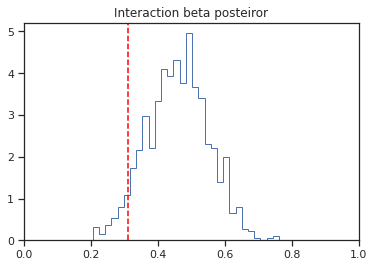

In [148]:
# Bayesian 'hypothesis test' checking whether the interaction is 'significant'

interaction_trace = hddm_models_reg_interact[0].get_traces()['v_cov_1:cov_2'].values
interaction_trace_sorted = np.sort(interaction_trace)

percentile = 0.05
plt.hist(interaction_trace, bins = 30, histtype = 'step', density = True)
plt.axvline(x = interaction_trace_sorted[int(np.floor(percentile * interaction_trace.shape[0]))], 
            color = 'red', linestyle = 'dashed')
plt.title('Interaction beta posteiror')
plt.xlim((0, 1))

### Interactions (Categorical Covariates)

This example comes closest to **ANOVA** style analysis.

In [149]:
# Make data
n_trials = 1000

beta_v_intercept = 1
beta_v_cov_1 = 1
beta_v_cov_2 = -1
beta_v_interaction = 0.5
cov_1 = np.concatenate([np.ones(500), np.zeros(500)]) #np.random.uniform(low = -1, high = 1, size = n_trials)
cov_2 = np.concatenate([np.ones(250), np.zeros(250), np.ones(250), np.zeros(250)]) # np.random.uniform(low = -1, high = 1, size = n_trials)
v = beta_v_intercept + beta_v_cov_1 * cov_1 + beta_v_cov_2 * cov_2 + beta_v_interaction * cov_1 * cov_2
a = 3
t = 1
z = 0.4

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [150]:
sim_out = hddm.simulators.simulator(theta = theta, 
                                    model = 'ddm_vanilla',
                                    n_samples = 1,
                                    max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])
data['cov_1'] = cov_1
data['cov_2'] = cov_2
data['cov_1'] = data['cov_1'].apply(str)
data['cov_2'] = data['cov_2'].apply(str)

In [151]:
data

,rt,response,v,a,z,t,cov_1,cov_2
0,1.806993,1.0,1.5,3.0,0.4,1.0,1.0,1.0
1,2.618020,1.0,1.5,3.0,0.4,1.0,1.0,1.0
2,1.493997,1.0,1.5,3.0,0.4,1.0,1.0,1.0
3,2.094995,1.0,1.5,3.0,0.4,1.0,1.0,1.0
4,1.716994,1.0,1.5,3.0,0.4,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
995,3.139027,1.0,1.0,3.0,0.4,1.0,0.0,0.0
996,3.453005,1.0,1.0,3.0,0.4,1.0,0.0,0.0
997,1.460998,1.0,1.0,3.0,0.4,1.0,0.0,0.0
998,3.128028,1.0,1.0,3.0,0.4,1.0,0.0,0.0


In [152]:
# Run Model
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1 + cov_1 * cov_2', 'link_func': identity_link}]

hddm_models_reg_interact = []
n_models = 1

for i in range(n_models):
    hddm_models_reg_interact.append(hddm.HDDMRegressor(data,
                                                       reg_models,
                                                       informative = True,
                                                       is_group_model = False,
                                                       group_only_regressors = True,
                                                       include = ['z'],
                                                       p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_reg_interact[i].sample(nmcmc,
                                       burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 122.6 sec

In [153]:
hddm_models_reg_interact[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.133511,0.065667,3.00346,3.08932,3.132351,3.180116,3.259844,0.003913
t,0.991305,0.017442,0.954532,0.98048,0.991255,1.003074,1.025361,0.001076
z_Intercept,0.41207,0.012066,0.388513,0.40434,0.412275,0.419599,0.43572,0.000716
v_Intercept,1.090374,0.052223,0.994351,1.054342,1.090284,1.126844,1.192983,0.003714
v_cov_1[T.1.0],0.940493,0.082819,0.783328,0.883556,0.942071,0.992947,1.112397,0.005801
v_cov_2[T.1.0],-1.090818,0.062185,-1.218202,-1.132491,-1.087307,-1.047429,-0.974007,0.004176
v_cov_1[T.1.0]:cov_2[T.1.0],0.650929,0.109233,0.436134,0.577175,0.649197,0.728338,0.856451,0.0078


### Priors

We try to illustrate the effect of choosing between *informative* and *uninformative* priors in your data analysis (and relatedly the added benefit you might expect from introducing more user side freedom on prior choice). We pick a number of different dataset-sizes (trial numbers), run inference *once with informative* and *once with uninformative* priors and then compare the posteriors for each of the parameters **\[v, a, z, t\]**.

**Spoiler-alert**:

Don't expect much !

In [154]:
# Generate some data
n_samples = 10000
parameters = hddm.model_config.model_config['ddm_vanilla']['params_default']
parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('t')] = 0.5

theta = np.zeros((n_samples, 4))
theta[:, 0] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('v')]
theta[:, 1] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('a')]
theta[:, 2] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('z')]
theta[:, 3] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('t')]

sim_out = hddm.simulators.simulator(theta = parameters, 
                                    model = 'ddm_vanilla',
                                    n_samples = n_samples,
                                    max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])

theta is supplied as list --> simulator assumes n_trials = 1


In [156]:
# Choose sample sizes for our model fits
sample_sizes = [32, 64, 128, 256, 512, 1024]
stats_list = []
trace_list = []

for n_samples_tmp in sample_sizes:
    print('Sample size: ', n_samples_tmp)
    data_tmp = data.sample(n_samples_tmp).reset_index(drop = True)
    
    # Informative -----
    hddm_model_tmp = hddm.HDDM(data_tmp,
                               informative = True,
                               is_group_model = False,
                               include = ['z'],
                               p_outlier = 0)
    hddm_model_tmp.sample(1000, burn = 500)
    
    # Save traces
    tmp_traces = hddm_model_tmp.get_traces()
    tmp_traces['informative'] = 1
    tmp_traces['sample_size'] = n_samples_tmp
    trace_list.append(deepcopy(tmp_traces))
    # -----
    
    # Uninformative -----
    hddm_model_tmp = hddm.HDDM(data_tmp,
                               informative = False,
                               is_group_model = False,
                               include = ['z'],
                               p_outlier = 0)
    hddm_model_tmp.sample(1000, burn = 500)
    
    # Save traces
    tmp_traces = hddm_model_tmp.get_traces()
    tmp_traces['informative'] = 0
    tmp_traces['sample_size'] = n_samples_tmp
    trace_list.append(deepcopy(tmp_traces))
    # -----

trace_df = pd.concat(trace_list)
trace_df['sample_size'] = trace_df['sample_size'].apply(str)

Sample size:  32
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 7.5 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 7.4 secSample size:  64
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.6 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.5 secSample size:  128
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.4 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.4 secSample size:  256
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%--------

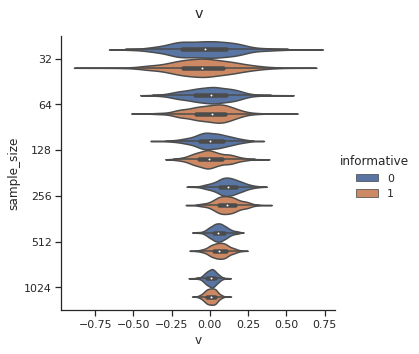

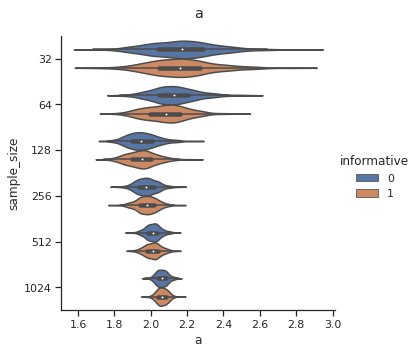

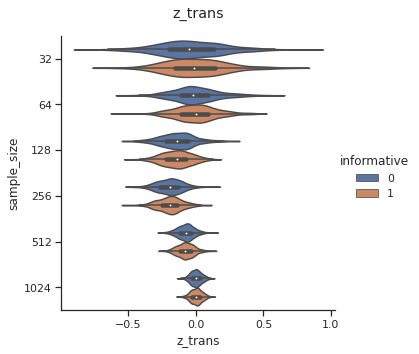

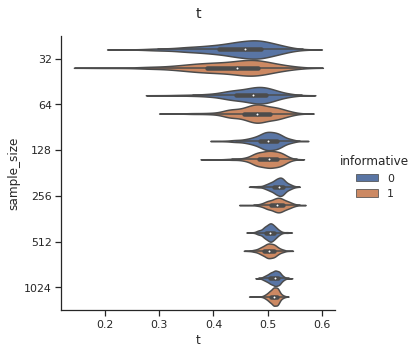

In [157]:
for param in ['v', 'a', 'z_trans', 't']:
    g = sns.catplot(x=param, y="sample_size", hue="informative",
                kind="violin", data=trace_df, title = param)
    g.fig.subplots_adjust(top = 0.9)
    g.fig.suptitle(param)

### END